# **Model Testing**

**All Features:**

Data columns (total 29 columns):

Specific Identifiers:

- BillID      51067 non-null object


How far it made it:

- PassH       51067 non-null int64
- PassS       51067 non-null int64
- PLawDate    1393 non-null object - MAKE BOOL?
- PLawNum     51067 non-null object
- PLaw        51067 non-null int64
- Veto        51067 non-null int64

Bill Descriptive Info:

- BillType    51067 non-null object
- Title       51067 non-null object
- Cong        51067 non-null int64
- Summary     51017 non-null object - REMOVE NULL
- ImpBill     51067 non-null int64
- Chamber     51067 non-null int64 (H or S)

Info about Rep Bill Proposer:

- Cosponsr    51067 non-null float64
- IntrDate    51025 non-null object - REMOVE NULL
- Mult        51067 non-null int64
- Class       51067 non-null float64
- District    51067 non-null float64
- FrstConH    51067 non-null float64
- FrstConS    51067 non-null float64
- Gender      51067 non-null int64
- MRef        51067 non-null int64
- NameFull    51067 non-null object
- Party       51067 non-null float64
- Postal      51067 non-null object
- Majority    51067 non-null int64

Other general bill info:

- Major       51067 non-null float64
- Minor       51067 non-null float64

The URL:

- URL         51067 non-null object


List of the models to test and the parameters to tune:
  
**Models:**
- Naive Bayes
- Logistic Regression
- Random Forest
- SVM

**Evaluations:**
- Accuracy, precision, recall, f1
- Confusion Matrix
- ROC/AUC

**Class Imbalance Issues:**
- Run a model on just one topic with good class distribution:
- Undersampling
- Use top 10 words for each PassH as features


- try running models with only words
- ADD top five pass, top five not pass


- try one without 112th
    

# **Query Data**

In [2]:
import mysql.connector 
import numpy as np
import pandas as pd
import config_final
import requests

from sodapy import Socrata
import sqlalchemy as db

import config_final as config
from schema import DbSchema



In [3]:
bills_db = DbSchema(config)

# topics_db = bills_db.query('SELECT * from topics')

In [4]:
#Full dataframe for running models

# df = bills_db.query("""
#     SELECT cb.BillID, 
#         cb.BillType, 
#         cb.Chamber, 
#         cb.Cong, 
#         cb.Cosponsr, 
#         cb.Title,
#         cb.IntrDate,
#         cb.Mult,
#         cb.PLaw,
#         cb.Veto,
#         cb.District,
#         cb.FrstConH,
#         cb.FrstConS,
#         cb.Gender,
#         cb.NameFull,
#         cb.Party,
#         cb.Postal,
#         cb.PassH,
#         cb.PassS,
#         cb.PLawDate,
#         cb.Majority,
#         tp.dominant_topic         
#     FROM 
#         con_bills.current_bills as cb
#     JOIN
#         con_bills.topics as tp
#     ON cb.BillID = tp.BillID
#     WHERE cb.Cong >= 110""")


dominant_topic  PassH
0               0        5172
                1         372
                
1               0        2992
                1         188
                
2               0        2124
                1         226
                
3               0        2901
                1         103
                
4               0        3309
                1         221
                
5               0        3665
                1         326
                
6               0        5171
                1          95
                
**7               0        4723 - 1        1445**
                
8               0        3752
                1         210
                
9               0        3280
                1         213
                
10              0        2378
                1          74
                
11              0        4099
                1         396
                
12              0        3476
                1         156
dtype: int64
#All bills passsed by the 112th Con

In [17]:
df.groupby(['dominant_topic', 'PassH']).size()

dominant_topic  PassH
0               0        5172
                1         372
1               0        2992
                1         188
2               0        2124
                1         226
3               0        2901
                1         103
4               0        3309
                1         221
5               0        3665
                1         326
6               0        5171
                1          95
7               0        4723
                1        1445
8               0        3752
                1         210
9               0        3280
                1         213
10              0        2378
                1          74
11              0        4099
                1         396
12              0        3476
                1         156
dtype: int64

In [8]:
#All bills passsed by the 112th Congress

pass_by_cong = bills_db.query("""
    SELECT
        cb.Cong,
        cb.PassH
    FROM con_bills.current_bills as cb
    WHERE cb.Cong = 112 
    AND cb.PassH = 1
    """)
pass_by_cong.head()

,Cong,PassH
0,112,1
1,112,1
2,112,1
3,112,1
4,112,1


In [21]:
#Get a query of all topics counts by PassH
#Run model on just that one topic that is most evenly distributed

df = bills_db.query("""
    SELECT
        cb.BillType, 
        cb.Chamber, 
        cb.Cong, 
        cb.Cosponsr, 
        cb.Title,
        cb.Mult,
        cb.District,
        cb.FrstConH,
        cb.Gender,
        cb.NameFull,
        cb.Party,
        cb.Postal,
        cb.PassH,
        cb.Majority,
        tp.dominant_topic   
    FROM con_bills.current_bills as cb
    JOIN con_bills.topics as tp
    ON cb.BillID = tp.BillID
    WHERE tp.dominant_topic = 7
    AND cb.Cong >=110
    """)
df.head()

,BillType,Chamber,Cong,Cosponsr,Title,Mult,District,FrstConH,Gender,NameFull,Party,Postal,PassH,Majority,dominant_topic
0,hr,0,110,4.0,To amend the Foreign Affairs Reform and Restru...,1,33.0,0.0,1,Diane Watson,100.0,CA,1,1,7
1,hr,0,110,0.0,To designate the United States customhouse bui...,1,0.0,0.0,0,Luis Fortuno,200.0,PR,1,0,7
2,hr,0,110,4.0,To designate the Federal building located at 2...,1,3.0,0.0,0,Leonard Boswell,100.0,IA,1,1,7
3,hr,0,110,56.0,To streamline the regulation of nonadmitted in...,1,3.0,0.0,0,Dennis Moore,100.0,KS,1,1,7
4,hr,0,110,1.0,To increase community development investments ...,1,4.0,0.0,0,Barney Frank,100.0,MA,1,1,7


# **Final EDA - Topics and Metadata**

In [22]:
# passed_bills['NameFull'].value_counts(ascending=False).head(50).plot(kind='barh', figsize=(20,20))

# **Final Data Cleaning**

Add:
- Len title words or anything?
- tfidf on title?

REMOVE:
- PLawNum (not necessary for analysis)
- Major/Minor (no keys)
- PLawDate (too few)
- ImpBill (almost all are)


Edit: 
- BillType: 
- Chamber: To binary
- Cong: OHE
- Postal: OHE

How to deal with: Things that happen after House passage!?

In [23]:
df.shape

(6168, 15)

In [24]:
df.isnull().sum()

BillType          0
Chamber           0
Cong              0
Cosponsr          0
Title             0
Mult              0
District          0
FrstConH          0
Gender            0
NameFull          0
Party             0
Postal            0
PassH             0
Majority          0
dominant_topic    0
dtype: int64

In [25]:
#Replace Nulls in IntrDate - Figure out how to do this!
#Maybe change to just month or just year
# df['IntrDate'].head()

In [26]:
df.BillType.value_counts()

hr    3691
s     2477
Name: BillType, dtype: int64

# **Final Engineering:**

**Engineer Cosponsors:**

Relevant info for cosponsorship: https://fas.org/sgp/crs/misc/RS22477.pdf

- min is 0, max is 432
- total value count is 325
- Big dropoff in count after around 30-40 cosponsors (becomes less than 100 instances)

In [27]:
test=[]
for x in df['Cosponsr']:
    if x == 38.0:
        test.append(x)
        
len(test)

4

In [28]:
def cosponsr_clean(x):
    if x <= 44.0:
        return x
    if x > 44.0:
        return 50
        

In [29]:
def party_clean(x):
    if x == 100.0:
        return 0
    if x == 200.0:
        return 1
    if x == 328.0:
        return 3

In [30]:
def billtype_clean(x):
    if x == 'hr':
        return 0
    if x == 's':
        return 1
     

In [31]:
df.Majority.value_counts()

1    4075
0    2093
Name: Majority, dtype: int64

**Add Columns:**

- Add a columns of Title Length. We saw in EDA that title length for passing bills tended to be longer.
- Add cleaned cosponsor column

In [32]:
def final_columns(df):
    
    df['title_len'] = [len(summary) for summary in df['Title']]
    
    df['BillType'] = df['BillType'].map(lambda x: billtype_clean(x))
    
    df['clean_cosponsr'] = df['Cosponsr'].map(lambda x: cosponsr_clean(x))

    df['clean_party'] = df['Party'].map(lambda x: party_clean(x))
    
    df.drop(columns=['Title','Cosponsr', 'Party'], inplace=True)
        
    return df

# Finalize Dataframe:

In [33]:
final_df = final_columns(df)

In [34]:
final_df.head()

,BillType,Chamber,Cong,Mult,District,FrstConH,Gender,NameFull,Postal,PassH,Majority,dominant_topic,title_len,clean_cosponsr,clean_party
0,0,0,110,1,33.0,0.0,1,Diane Watson,CA,1,1,7,139,4.0,0
1,0,0,110,1,0.0,0.0,0,Luis Fortuno,PR,1,0,7,500,0.0,1
2,0,0,110,1,3.0,0.0,0,Leonard Boswell,IA,1,1,7,500,4.0,0
3,0,0,110,1,3.0,0.0,0,Dennis Moore,KS,1,1,7,94,50.0,0
4,0,0,110,1,4.0,0.0,0,Barney Frank,MA,1,1,7,97,1.0,0


In [35]:
final_df.shape

(6168, 15)

# **Train and Test**

In [36]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['PassH'], axis=1)
y = df['PassH']


In [37]:
X.head()


,BillType,Chamber,Cong,Mult,District,FrstConH,Gender,NameFull,Postal,Majority,dominant_topic,title_len,clean_cosponsr,clean_party
0,0,0,110,1,33.0,0.0,1,Diane Watson,CA,1,7,139,4.0,0
1,0,0,110,1,0.0,0.0,0,Luis Fortuno,PR,0,7,500,0.0,1
2,0,0,110,1,3.0,0.0,0,Leonard Boswell,IA,1,7,500,4.0,0
3,0,0,110,1,3.0,0.0,0,Dennis Moore,KS,1,7,94,50.0,0
4,0,0,110,1,4.0,0.0,0,Barney Frank,MA,1,7,97,1.0,0


In [38]:
#Do i need to transform back after modeling?
encoder = preprocessing.LabelEncoder()

y_train = encoder.fit_transform(y_train1)
y_test = encoder.fit_transform(y_test1)

NameError: name 'preprocessing' is not defined

**One hot encoding**

All categorical variables:
- 

In [39]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

Then One-Hot-Encode:

- Encode categorical integer features using a one-hot aka one-of-K scheme.
- The input to this transformer should be a matrix of integers, denoting the values taken on by categorical (discrete) features.
- The output will be a sparse matrix where each column corresponds to one possible value of one feature.
- It is assumed that input features take on values in the range [0, n_values).
- This encoding is needed for feeding categorical data to many scikit-learn estimators, notably linear models and SVMs with the standard kernels.

# **Modeling**

Import packages:

- CountVectorizer
- TFIDF

- Naive Bayes
- Logistic Regression
- Random Forest

**Remember to look at feature importances!

In [40]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction import FeatureHasher

# We will train our classifier with the following features:

# We create the preprocessing pipelines for all data types.


In [41]:
no_change_features = ['PassH', 'Chamber','Mult', 'Gender', 'Majority']
# no_change_transformer = Pipeline(steps=[
#     ()])

In [42]:
numeric_features = ['clean_cosponsr', 'title_len']
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

In [43]:
categorical_features = ['Postal', 'dominant_topic', 'District', 'Cong', 'clean_party', 'FrstConH', 'NameFull']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [44]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline - laid out for each model below.

**Train test split**

In [45]:
#Train Test split!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=1)

Chi-square

**Naive Bayes**

In [47]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


nb = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', MultinomialNB())]) #get parameters
parameters = None

nb.fit(X_train, y_train)

nb_y_pred = nb.predict(X_test)

print(confusion_matrix(y_test, nb_y_pred))
print(classification_report(y_test, nb_y_pred))

nb_confusion_matrix = (confusion_matrix(y_test, nb_y_pred))

[[878  86]
 [101 169]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       964
           1       0.66      0.63      0.64       270

    accuracy                           0.85      1234
   macro avg       0.78      0.77      0.77      1234
weighted avg       0.85      0.85      0.85      1234



In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

#shows percent data represented in each quadrant

sns.heatmap(nb_confusion_matrix/np.sum(nb_confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

Text(0.5, 1, 'Confusion Matrix')

Use Pipeline or DFMapper!

EXAMPLE

In [49]:

# data = data.fillna('')
 
# #Add the features of the dataframe that you want to transform and/or combine
# mapper = DataFrameMapper([
#      ('Summary', TfidfVectorizer()), #add paramaters from Topic Modeling
#      ('nb_like', None),
#      ('picture_labels', TfidfVectorizer()),
#      ('nb_share', None),
#  ])
 
# """
# Use the fit_transform method to transform the old dataframe into a new one
# that can be fed to the machine learning algorithm.
# """
 
# #sample Usage
# features = mapper.fit_transform(data)
# categories = data['INDEX New']
 
# # Split the data between train and test
# x, x_test, y, y_test = train_test_split(features,categories,test_size=0.2,train_size=0.8, random_state = 0)
 
# clf = sk.RandomForestClassifier(random_state=0)
# clf.fit(x, y)
 
# predicted = clf.predict(x_test)
 
# printreport(y_test, predicted)

**Logistic Regression**

- Precision means the percentage of your results which are relevant. 
- recall refers to the percentage of total relevant results correctly classified by your algorithm.

Also make a precision recall curve

In [50]:
from sklearn.linear_model import LogisticRegression

# Bring in OHE?

lr_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(class_weight='balanced'))]) #get parameters

# Logistic Regression Classifier
# lr_classifier = LogisticRegression()

lr_clf.fit(X_train, y_train)

lr_y_pred = lr_clf.predict(X_test)

print(confusion_matrix(y_test, lr_y_pred))
print(classification_report(y_test, lr_y_pred))

lr_confusion_matrix = confusion_matrix(y_test, lr_y_pred)

[[857 107]
 [ 61 209]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       964
           1       0.66      0.77      0.71       270

    accuracy                           0.86      1234
   macro avg       0.80      0.83      0.81      1234
weighted avg       0.87      0.86      0.87      1234



/Users/melissamunz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Text(0.5, 1, 'Confusion Matrix')

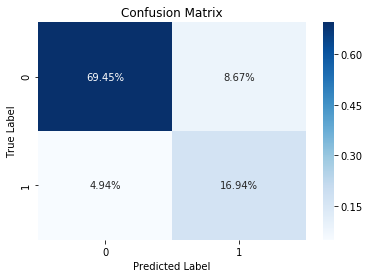

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

#shows percent data represented in each quadrant

sns.heatmap(lr_confusion_matrix/np.sum(lr_confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

In [53]:
#for ROC/AUC Curve

lr_dec = lr_clf.decision_function(X_test)

import numpy as np
from sklearn.metrics import roc_auc_score
lr_roc_auc = roc_auc_score(y_test, lr_y_pred)
lr_roc_auc

#This is a decent ROC Score. Remember lays between .5 and 1

0.8315391117258337

Test AUC: 0.9216113416320884


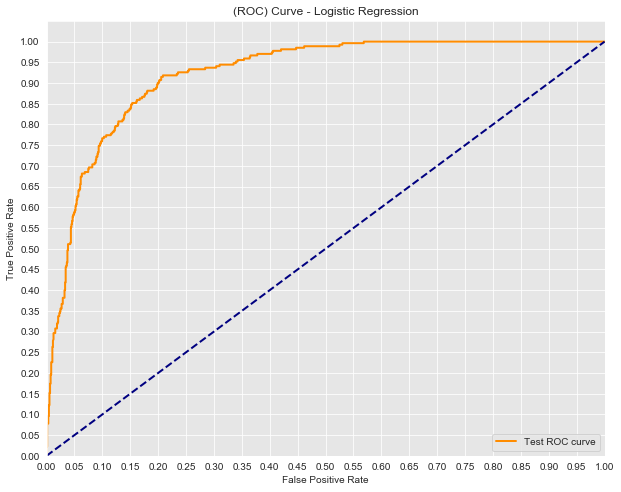

In [57]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, lr_dec)

print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [58]:
from sklearn.metrics import average_precision_score

lr_average_precision = average_precision_score(y_test, lr_dec)

print('Average precision-recall score: {0:0.2f}'.format(
      lr_average_precision))

Average precision-recall score: 0.75


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.75')

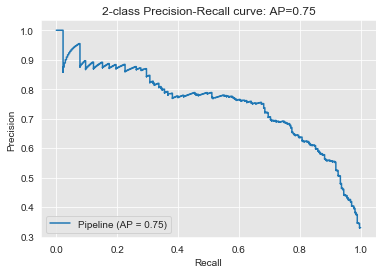

In [59]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(lr_clf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(lr_average_precision))

Evaluate:
- ROC/AUC

**Random Forest**

Class Imbalance: To overcome this issue, we used repeated random sub-sampling. Initially, we construct the testing data and the NoS training data sub-samples. For each disease, we train NoS classifiers and test all of them on the same data set. The final labels of the testing data are computed using a majority voting scheme.

In [60]:
from sklearn.ensemble import RandomForestClassifier

#add bag of trees?
#add OHE

rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(max_depth=None, max_features='auto', n_estimators=10, class_weight="balanced"))])


rf_pipeline.fit(X_train, y_train) 

rf_y_pred = rf_pipeline.predict(X_test)

print(confusion_matrix(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

rf_confusion_matrix = confusion_matrix(y_test, rf_y_pred)

[[905  59]
 [ 86 184]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       964
           1       0.76      0.68      0.72       270

    accuracy                           0.88      1234
   macro avg       0.84      0.81      0.82      1234
weighted avg       0.88      0.88      0.88      1234



Text(0.5, 1, 'Confusion Matrix')

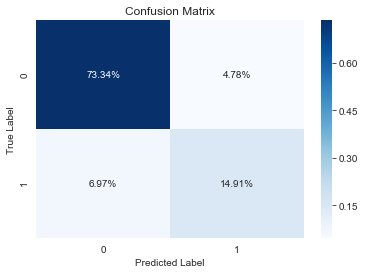

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

#shows percent data represented in each quadrant

sns.heatmap(rf_confusion_matrix/np.sum(rf_confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

In [68]:
feature_names = rf_pipeline.named_steps['preprocessor'].transformers_[1][1]\
   .named_steps['onehot'].get_feature_names(categorical_features)

In [69]:
importances = rf_pipeline.steps[1][1].feature_importances_
len(importances)

790

In [70]:
indices = np.argsort(importances)[::-1]
top_k = 10
new_indices = indices[:top_k]

In [71]:
new_indices

array([  0,   1, 111,  59, 113, 112, 110, 109,  32, 115])

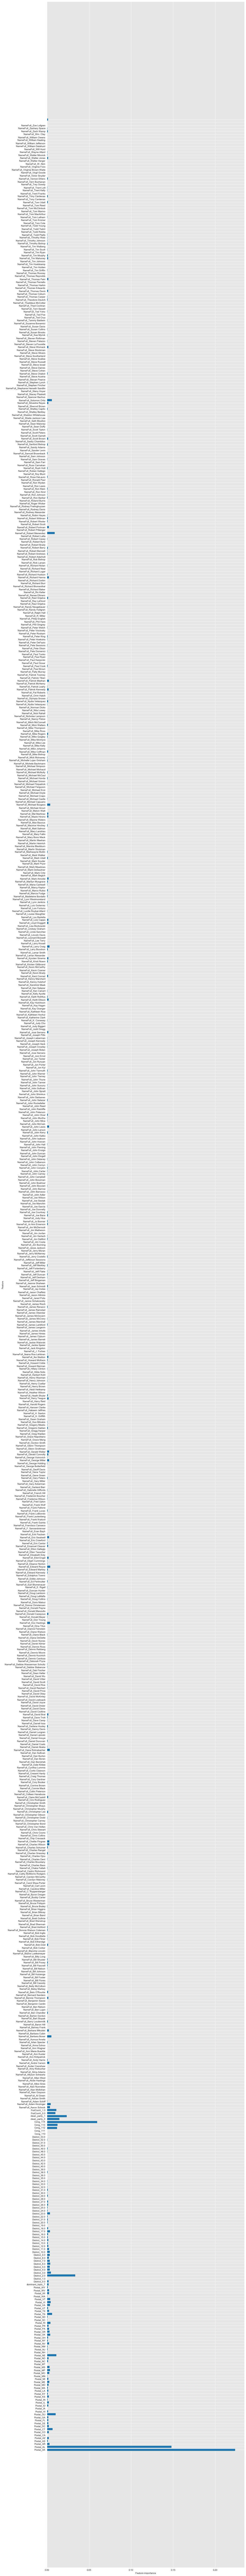

In [73]:
import matplotlib.pyplot as plt

def plot_feature_importances(model):
    
#     n_features = importances.shape
    
    plt.figure(figsize=(15,200))
    plt.barh(range(790), importances, align='center') 
    
    plt.yticks(np.arange(790), feature_names) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(rf_pipeline)

**FINAL MODEL**

**Further Evaluation**:
- Classification Report
- Confusion Matrix
- ROC/AUC

https://www.kaggle.com/selener/multi-class-text-classification-tfidf

In [ ]:
# Pretty Confusion Matrix - need to change for each model

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.Product.values, 
            yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16);

# Comparing all Models:

In [ ]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [ ]:

mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc